In [57]:
%matplotlib inline
%run boilerplate.py

Get DARM
Get POP9Q
Get AS_B45IP
Get AS_A45QP
Get AS_B45QY
Get REFL_B45IY


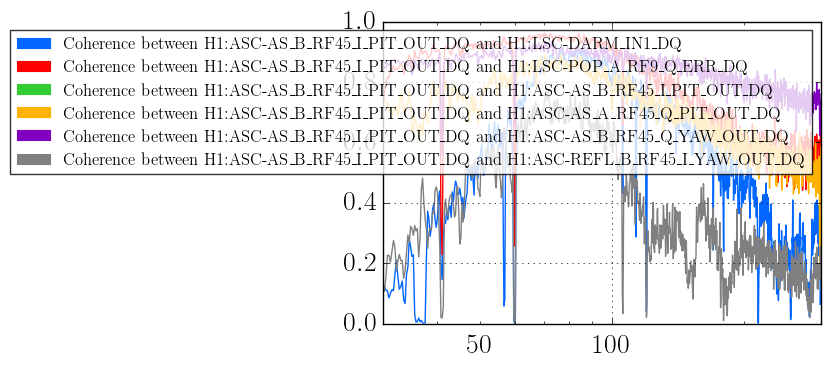

In [58]:
p1=FrequencySeriesPlot()
g1=p1.gca()
for data in data_lst:
    g1.plot(data_lst[2].coherence(data,4,3))
g1.set_xlim(30,300)
g1.set_xscale('log')

In [59]:
from gwpy.frequencyseries import FrequencySeries

In [60]:
def inner_product(data1,data2):
    assert data1.duration==data2.duration
    srate1=data1.sample_rate.value
    srate2=data2.sample_rate.value
    fdata1=rfft(sig.hann(len(data1))*data1.detrend().value)
    fdata2=rfft(sig.hann(len(data2))*data2.detrend().value)
    max_idx=min(len(fdata1),len(fdata2))
    return FrequencySeries(fdata1[:max_idx]*fdata2.conjugate()[:max_idx],
                           df=1./data1.duration)

In [22]:
tmp=inner_product(data_lst[0],data_lst[1])

(30, 300)

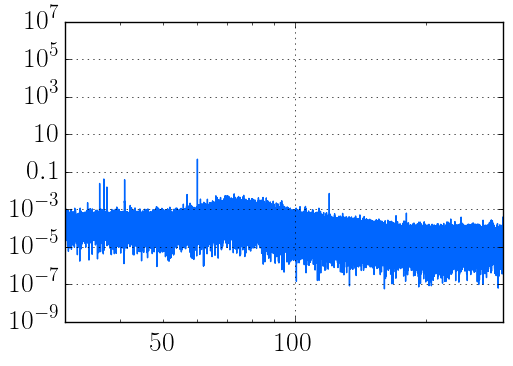

In [24]:
plt.loglog(arange(len(tmp))/300.,abs(tmp))
plt.xlim(30,300)

In [63]:
iprod1=inner_product(data_lst[0],data_lst[2])

win=sig.hann(2*300)
win/=sum(win)
iprod1ds=[]
for idx in range(10,1001):
    iprod1ds.append(sum(win*iprod1[(idx-1)*300:(idx+1)*300]))
iprod1ds=array(iprod1ds)

In [64]:
iprod2=inner_product(data_lst[2],data_lst[2])

win=sig.hann(2*300)
win/=sum(win)
iprod2ds=[]
for idx in range(10,1001):
    iprod2ds.append(sum(win*iprod2[(idx-1)*300:(idx+1)*300]))
iprod2ds=array(iprod2ds)

(10, 1000)

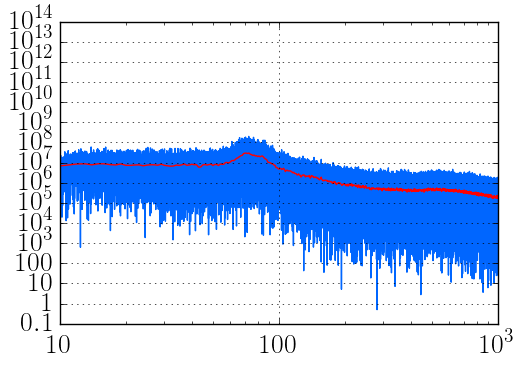

In [66]:
plt.semilogx(arange(len(iprod2))/300.,abs(iprod2))
plt.loglog(arange(10,1001),abs(iprod2ds))
plt.xlim(10,1000)

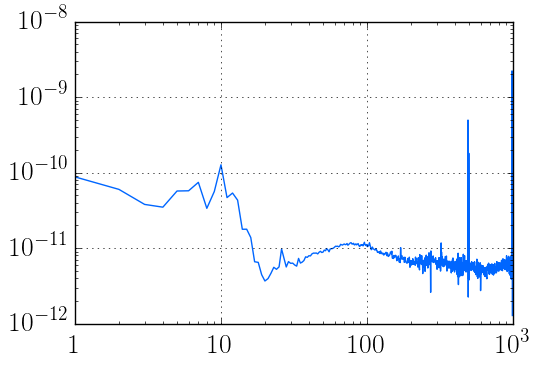

In [67]:
plt.loglog(abs(iprod1ds/iprod2ds))

(10, 1000)

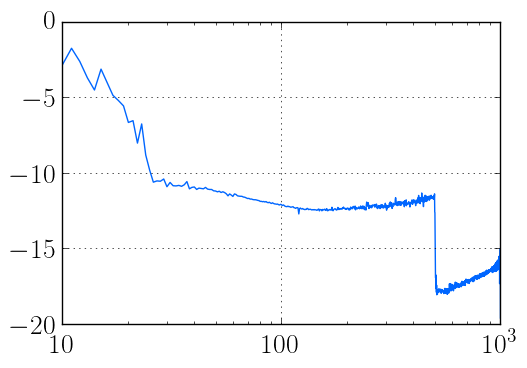

In [70]:
plt.semilogx(arange(10,1001),unwrap(angle(iprod1ds)))
plt.xlim(10,1000)

In [101]:
guess=zeros(1+8192,dtype=complex128)
guess[10:1001]=iprod1ds/iprod2ds

In [74]:
len(data_lst[0])/16384

300

In [94]:
tmp=(roll(irfft(guess),8192)*sig.hann(16384)).copy()
tmp.resize(len(data_lst[0]))
tmp=roll(tmp,-8192)

(-0.5, 1)

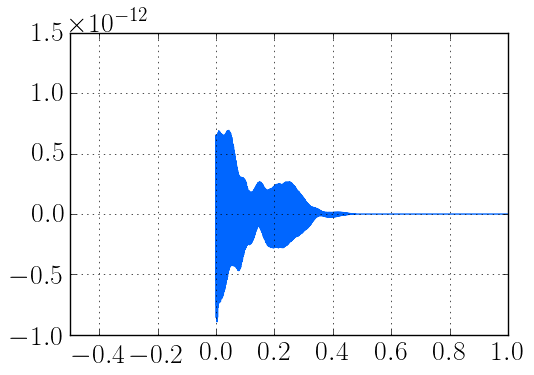

In [96]:
plt.plot(arange(300*16384)/16384.,tmp)
plt.xlim(-0.5,1)

In [113]:
witness=zeros(1+8192*300,dtype=complex128)
witness[:1+1024*300]=rfft(data_lst[2])
subtract=irfft(witness*rfft(tmp))

In [116]:
darm2=data_lst[0]-subtract

In [121]:
gwpy_d2=TimeSeries(darm2,sample_rate=16384,name='Nice')

(1e-14, 1e-10)

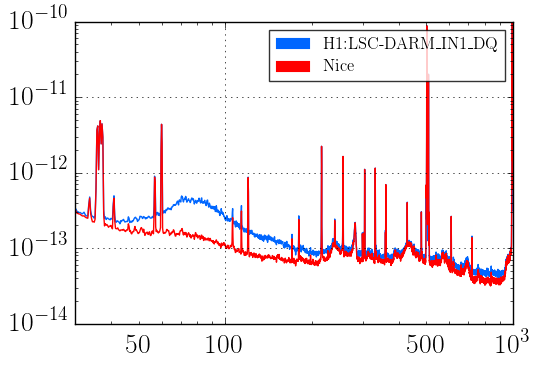

In [125]:
p1=data_lst[0].asd(4,3).plot()
p1.gca().plot(gwpy_d2.asd(4,3))
p1.gca().set_xlim(30,1000)
p1.gca().set_ylim(1e-14,1e-10)